In [1]:
import acquire
import pandas as pd
from bs4 import BeautifulSoup
from requests import get
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
new_or_used = 'all'
year = '2019'
make = 'Ford'
model = 'F-150'
domain_list = ['mccombsfordwest.com', 'jordanford.net', 'southwayford.com']

In [3]:
dataframes_of_dealership_data = {}
for domain in domain_list:
    dataframes_of_dealership_data[f'{domain}'] = acquire.get_dealership_data(domain, new_or_used, year, make, model)
    print(f'Completed {domain}')
    
dataframes_of_dealership_data

https://www.mccombsfordwest.com/searchall.aspx?Year=2019&Make=Ford&Model=F-150&pn=100
100
4
100
100
100
100
100
100
100
100
100
17
Completed mccombsfordwest.com
https://www.jordanford.net/searchall.aspx?Year=2019&Make=Ford&Model=F-150&pn=100
100
4
100
100
100
100
100
100
100
100
100
11
Completed jordanford.net
https://www.southwayford.com/searchall.aspx?Year=2019&Make=Ford&Model=F-150&pn=100
100
4
100
100
100
100
100
100
100
100
100
13
Completed southwayford.com


{'mccombsfordwest.com':     year  make             model condition    price           body_style  \
 0   2019  Ford  F-150 King Ranch       new  $56,067      Crew Cab Pickup   
 1   2019  Ford      F-150 Lariat       new  $46,804  Extended Cab Pickup   
 2   2019  Ford      F-150 Lariat       new  $49,862      Crew Cab Pickup   
 3   2019  Ford          F-150 XL       new  $28,502      Crew Cab Pickup   
 4   2019  Ford          F-150 XL       new  $28,502      Crew Cab Pickup   
 5   2019  Ford         F-150 STX       new  $28,502      Crew Cab Pickup   
 6   2019  Ford         F-150 STX       new  $28,502      Crew Cab Pickup   
 7   2019  Ford         F-150 STX       new  $28,502      Crew Cab Pickup   
 8   2019  Ford         F-150 STX       new  $32,482      Crew Cab Pickup   
 9   2019  Ford         F-150 STX       new  $32,482      Crew Cab Pickup   
 10  2019  Ford         F-150 STX       new  $48,252      Crew Cab Pickup   
 11  2019  Ford         F-150 STX       new  $32,482 

In [4]:
df = pd.concat(dataframes_of_dealership_data.values(), ignore_index=True)

In [5]:
df.head()

,year,make,model,condition,price,body_style,mileage,engine,transmission,drivetrain,ext_color,dealer
0,2019,Ford,F-150 King Ranch,new,"$56,067",Crew Cab Pickup,0,5.0L Ti-VCT V8 Engine with Auto Start/Stop Tec...,Automatic,RWD,Oxford White,McCombs Ford West
1,2019,Ford,F-150 Lariat,new,"$46,804",Extended Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,4WD,Magnetic Metallic,McCombs Ford West
2,2019,Ford,F-150 Lariat,new,"$49,862",Crew Cab Pickup,0,3.5L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,4WD,Magma Red Metallic,McCombs Ford West
3,2019,Ford,F-150 XL,new,"$28,502",Crew Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,RWD,Oxford White,McCombs Ford West
4,2019,Ford,F-150 XL,new,"$28,502",Crew Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,RWD,Oxford White,McCombs Ford West


In [6]:
df.dtypes

year            object
make            object
model           object
condition       object
price           object
body_style      object
mileage         object
engine          object
transmission    object
drivetrain      object
ext_color       object
dealer          object
dtype: object

In [7]:
df.year = df.year.astype('int')

In [8]:
df.price = df.price.str.replace('$', '').str.replace(',', '')

In [9]:
df.head()

,year,make,model,condition,price,body_style,mileage,engine,transmission,drivetrain,ext_color,dealer
0,2019,Ford,F-150 King Ranch,new,56067,Crew Cab Pickup,0,5.0L Ti-VCT V8 Engine with Auto Start/Stop Tec...,Automatic,RWD,Oxford White,McCombs Ford West
1,2019,Ford,F-150 Lariat,new,46804,Extended Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,4WD,Magnetic Metallic,McCombs Ford West
2,2019,Ford,F-150 Lariat,new,49862,Crew Cab Pickup,0,3.5L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,4WD,Magma Red Metallic,McCombs Ford West
3,2019,Ford,F-150 XL,new,28502,Crew Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,RWD,Oxford White,McCombs Ford West
4,2019,Ford,F-150 XL,new,28502,Crew Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,RWD,Oxford White,McCombs Ford West


In [10]:
df.mileage = df.mileage.astype('str').str.replace(',', '').astype('int')

In [11]:
df.head()

,year,make,model,condition,price,body_style,mileage,engine,transmission,drivetrain,ext_color,dealer
0,2019,Ford,F-150 King Ranch,new,56067,Crew Cab Pickup,0,5.0L Ti-VCT V8 Engine with Auto Start/Stop Tec...,Automatic,RWD,Oxford White,McCombs Ford West
1,2019,Ford,F-150 Lariat,new,46804,Extended Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,4WD,Magnetic Metallic,McCombs Ford West
2,2019,Ford,F-150 Lariat,new,49862,Crew Cab Pickup,0,3.5L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,4WD,Magma Red Metallic,McCombs Ford West
3,2019,Ford,F-150 XL,new,28502,Crew Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,RWD,Oxford White,McCombs Ford West
4,2019,Ford,F-150 XL,new,28502,Crew Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,RWD,Oxford White,McCombs Ford West


In [12]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [13]:
df = df[df.price.apply(is_number)]

In [14]:
df.price = df.price.astype('int')

In [15]:
df.dtypes

year             int32
make            object
model           object
condition       object
price            int32
body_style      object
mileage          int32
engine          object
transmission    object
drivetrain      object
ext_color       object
dealer          object
dtype: object

In [21]:
df.model.value_counts()

F-150 XLT                              120
F-150 XL                                38
F-150 STX                               37
F-150 Raptor                            31
F-150 XL STX Appearance Package         24
F-150 LARIAT                            20
F-150 Lariat                            12
F-150 King Ranch                         7
F-150 King Ranch®                        4
F-150 Limited                            2
F-150 Platinum                           2
F-150 Raptor Shelby Baja Raptor Pkg      1
Name: model, dtype: int64

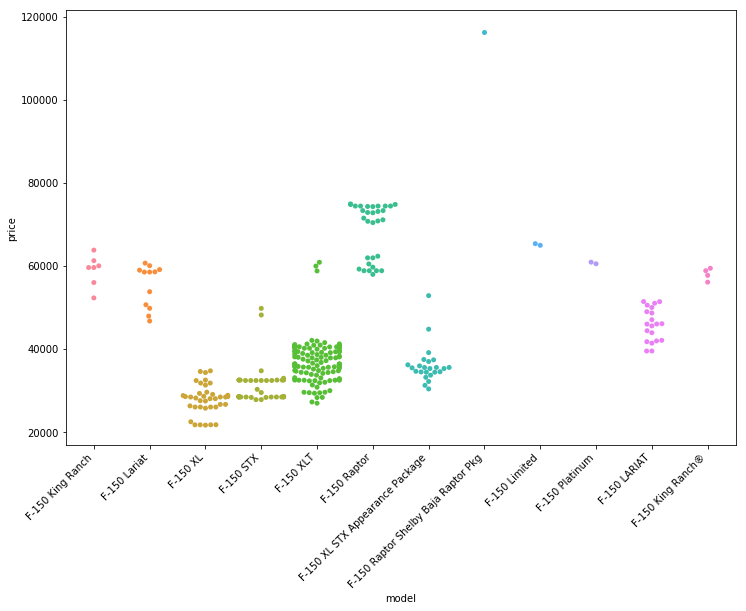

In [26]:
plt.figure(figsize=(12, 8))
sns.swarmplot(df.model, df.price)
plt.xticks(rotation=45, ha='right')
plt.show()

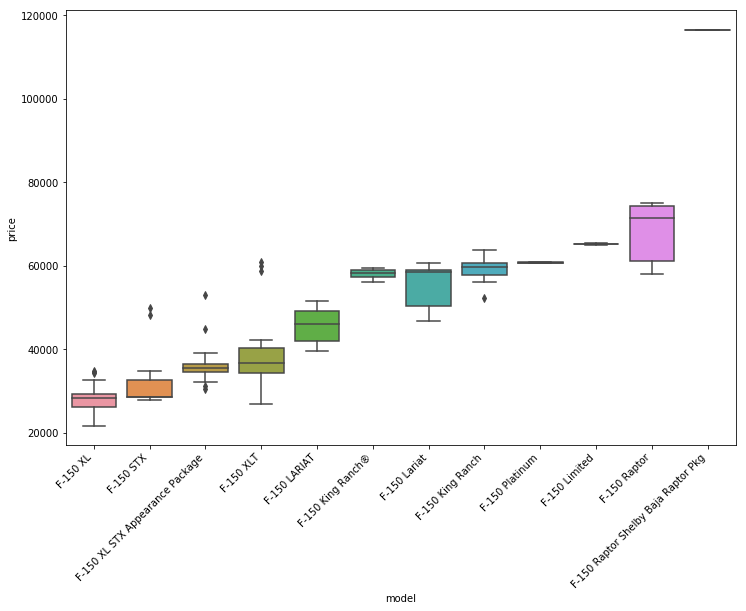

In [46]:
plt.figure(figsize=(12,8))

grouped = df.groupby('model')
df2 = pd.DataFrame({col:vals['price'] for col,vals in grouped})

meds = df2.median()
meds = meds.sort_values(ascending=True)

sns.boxplot(df.model, df.price, order=meds.index)
plt.xticks(rotation=45, ha='right')
plt.show()

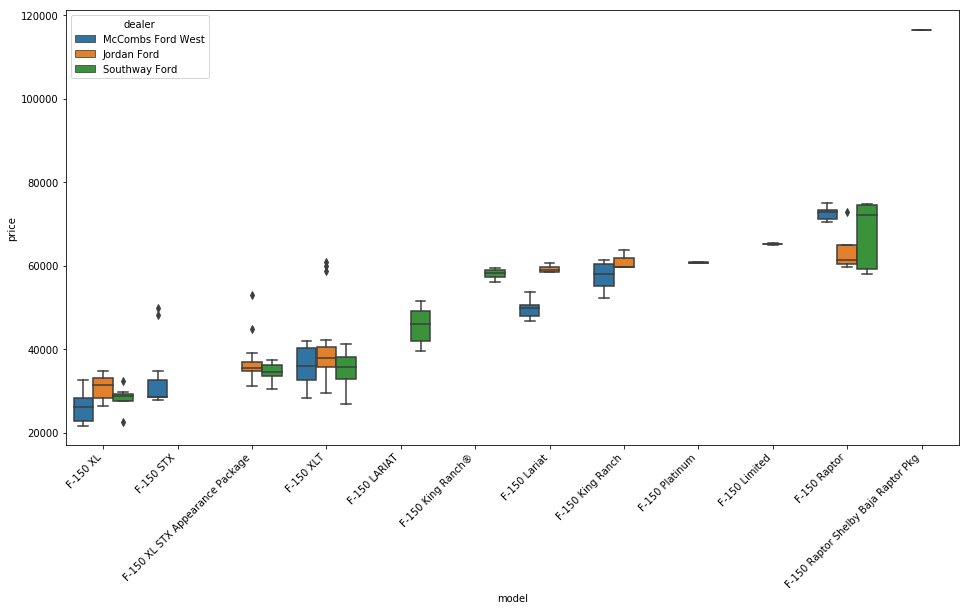

In [49]:
plt.figure(figsize=(16, 8))

grouped = df.groupby('model')
df2 = pd.DataFrame({col:vals['price'] for col,vals in grouped})

meds = df2.median()
meds = meds.sort_values(ascending=True)

sns.boxplot(df.model, df.price, order=meds.index, hue=df.dealer)
plt.xticks(rotation=45, ha='right')
plt.show()

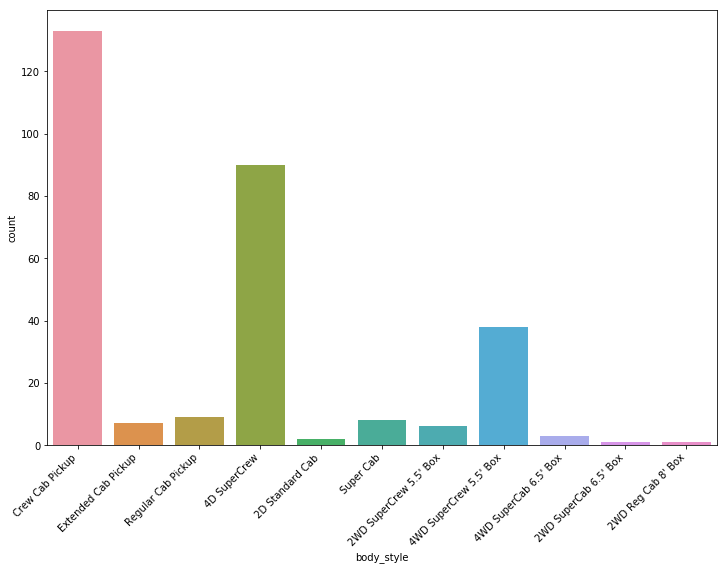

In [53]:
plt.figure(figsize=(12, 8))
sns.countplot(df.body_style)
plt.xticks(rotation=45, ha='right')
plt.show()

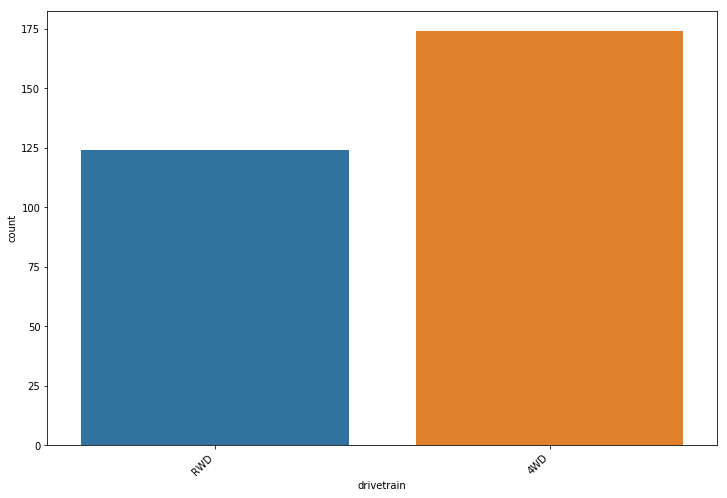

In [54]:
plt.figure(figsize=(12, 8))
sns.countplot(df.drivetrain)
plt.xticks(rotation=45, ha='right')
plt.show()